In [ ]:
import numpy as np
import scipy as sp
import scipy.io.wavfile
import scipy.signal as spsig 
import matplotlib.pyplot as plt
import random

%matplotlib inline

# **(a) Spectral Analysis I:**

## **(a-i) Read in signal**

In this part I use scipy.io.wavefile.read() to get the infromation from signal_long.wav.

In [ ]:
fs,x= scipy.io.wavfile.read('signal_long.wav')

I hear different dial tones, and they all sound like different tones which means they are sinusoids with different frequencies.

## **(a-ii) Separate digits**

In this part I first plotted the signal to see what I was working with and make a decision based on what it looked like. I saw that is was four clear equally spaced impulses, so I decided that each digit should occupy a fourth of the entire signal. After I plotted them to see what they looked like.


32000


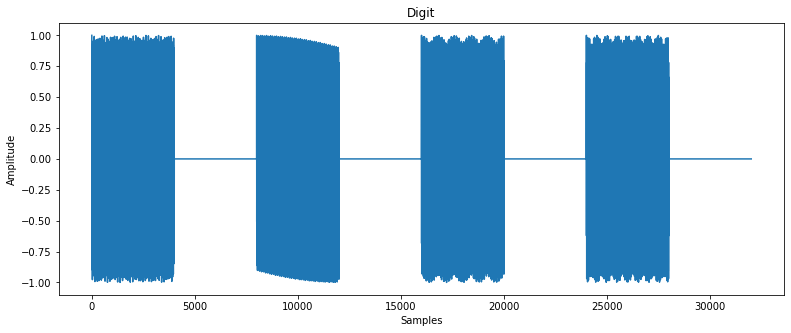

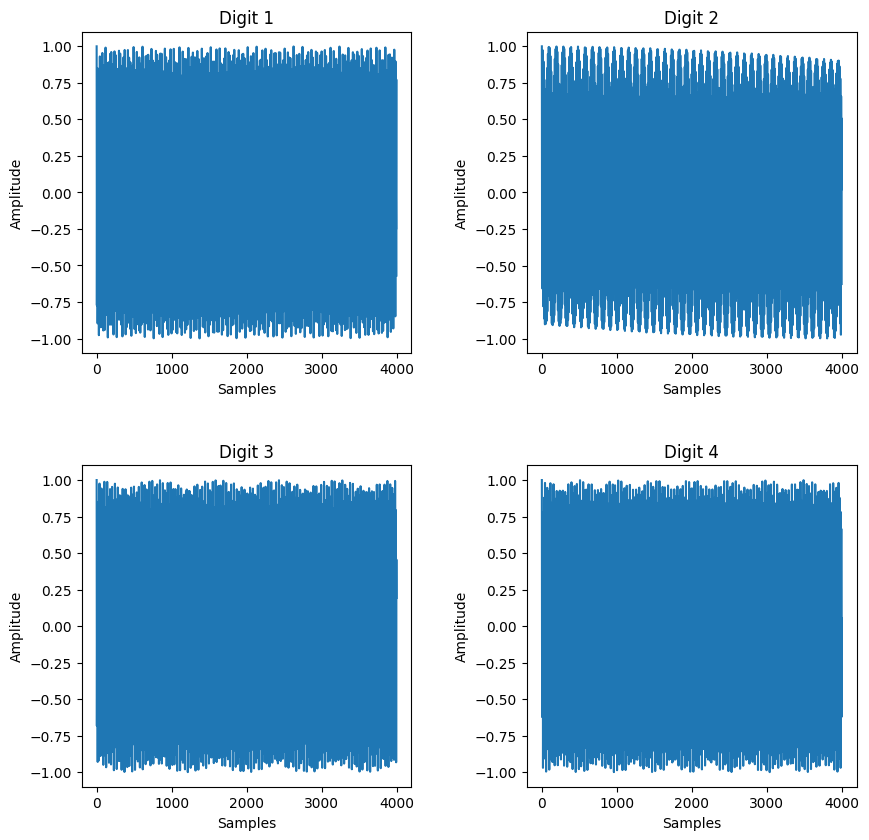

In [ ]:
plt.figure(figsize=(13,5))
plt.title('Digit')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(x)
print(len(x))
digitlen=int(len(x)/4)
digit1 = x[0:digitlen]
digit2 = x[digitlen:2*digitlen]
digit3 = x[2*digitlen:3*digitlen]
digit4 = x[3*digitlen:4*digitlen]

plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=.35)
plt.subplot(2, 2, 1)
plt.title('Digit 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit1[0:4000])

plt.subplot(2, 2, 2)
plt.title('Digit 2')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit2[0:4000])

plt.subplot(2, 2, 3)
plt.title('Digit 3')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit3[0:4000])

plt.subplot(2, 2, 4)
plt.title('Digit 4')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit4[0:4000])

Each digit is spaced evenly with 4000 samples, which is correct because they each have a sampling rate of 8000 and occur for 0.5 seconds.

## **(a-iii) Choose L and N**

Here I chose a large N so that there would be enough samles that the frequencies would come through. Too few frequncies and the frequency points would start blending together. 1000 seems like a nice round number. I made L=N because if I chose any lesser value I would have distorted the signal. I could have gone large on L but I didn't see a point in doing that.

In [ ]:
N = 1000
L = N


## **(a-iv) Magnitude spectra:** 

In this section I use fft to get the spectrum of the digits, then plot them against k. I made k with an np.arange that is the same length as n, and acts as the index for the spectrums.

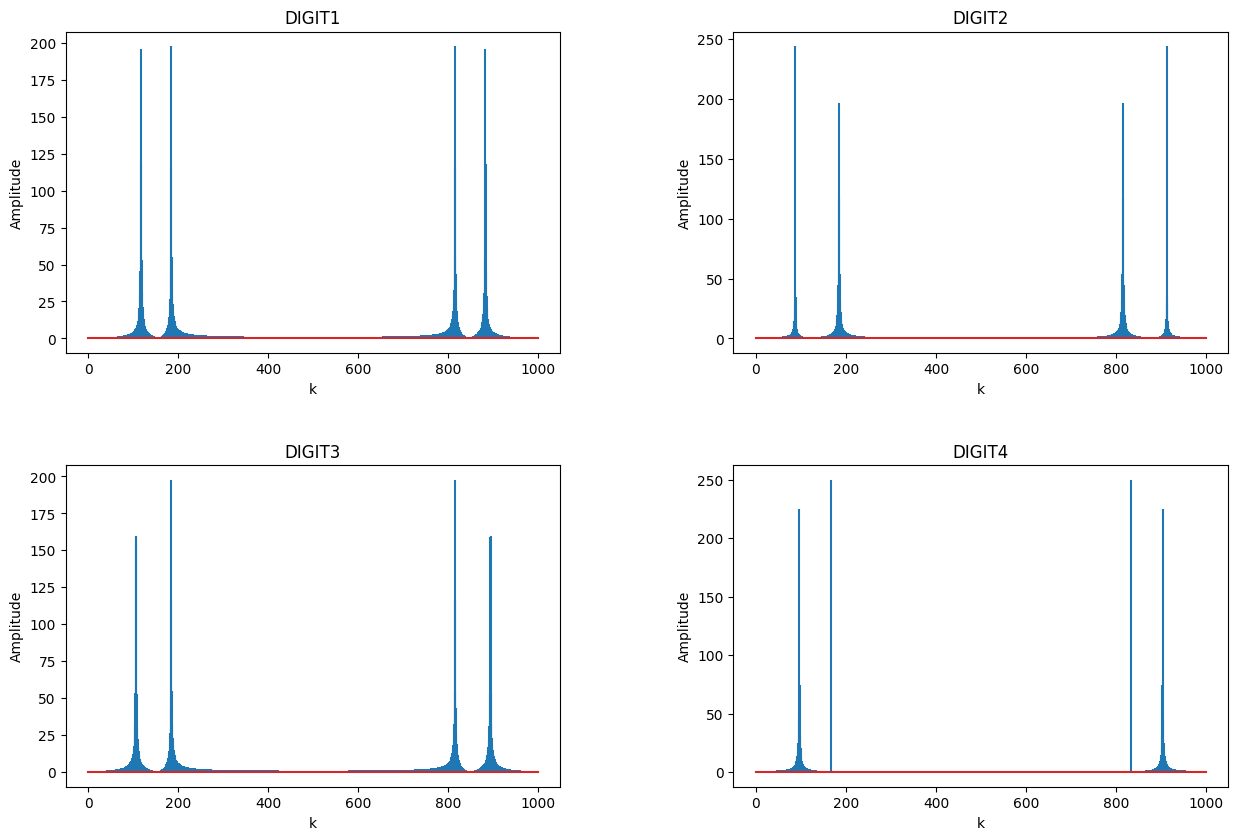

In [ ]:
k = np.arange(0,N)
plt.figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=.35)


DIGIT1 = np.fft.fft(digit1,N)
plt.subplot(2, 2, 1)
plt.title('DIGIT1')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k,abs(DIGIT1),markerfmt=' ',use_line_collection=1)

plt.subplot(2, 2, 2)
plt.title('DIGIT2')
plt.xlabel('k')
plt.ylabel('Amplitude')
DIGIT2 = np.fft.fft(digit2,N)
plt.stem(k,abs(DIGIT2),markerfmt=' ',use_line_collection=1)

plt.subplot(2, 2, 3)
plt.title('DIGIT3')
plt.xlabel('k')
plt.ylabel('Amplitude')
DIGIT3 = np.fft.fft(digit3,N)
plt.stem(k,abs(DIGIT3),markerfmt=' ',use_line_collection=1)

plt.subplot(2, 2, 4)
plt.title('DIGIT4')
plt.xlabel('k')
plt.ylabel('Amplitude')
DIGIT4 = np.fft.fft(digit4,N)
plt.stem(k,abs(DIGIT4),markerfmt=' ',use_line_collection=1)
z= 0







It is clear which k points represent the frequency of the sinouids by where they peak. We know it is two sinusiods because there are two peaks that are symeterical.

## **(a-v) Maximum indices:**

Here I wrote a for loop that goes through each digit and check if the amplitude is within the range that I want. I had to tweek the bounds on the third digit because eight indexs were showing up which I know is incorrect. I tweeked until it was only two frequency points. 

In [ ]:

k1 = []
for i in range(0,N):
    if 125<=abs(DIGIT1[i])<=300:
      k1 = k1 + [i]

k2 = []
for i in range(0,N):
    if 125<=abs(DIGIT2[i])<=300:
      k2 = k2 + [i]

k3 = []
for i in range(0,N):
    if 159<=abs(DIGIT3[i])<=300:
      k3 = k3 + [i]
k4 = []
for i in range(0,N):
    if 125<=abs(DIGIT4[i])<=300:
      k4 = k4 + [i]

print("k11 = ",k1[0],"  k12 = ",k1[1],"  k13 = ",k1[2],"  k14 = ",k1[3])
print("k21 = ",k2[0],"  k22 = ",k2[1],"  k23 = ",k2[2],"  k24 = ",k2[3])
print("k31 = ",k3[0],"  k32 = ",k3[1],"  k33 = ",k3[2],"  k34 = ",k3[3])
print("k41 = ",k4[0],"  k42 = ",k4[1],"  k43 = ",k4[2],"  k44 = ",k4[3])

k11 =  118   k12 =  185   k13 =  815   k14 =  882
k21 =  87   k22 =  185   k23 =  815   k24 =  913
k31 =  106   k32 =  185   k33 =  815   k34 =  894
k41 =  96   k42 =  167   k43 =  833   k44 =  904


## **(a-vi) Maximum frequencies:**

In this section I take the previous K values and multiply them by fbin to get the frequency points that the peaks occure at. I decided fbin by taking the sampling frequncy and dividing it by N. 

In [ ]:
fbin = 8000/N

f11 = k1[0]*fbin
f12 = k1[1]*fbin
print("Digit 1 frequencies: ",f11,f12)


f21 = k2[0]*fbin
f22 = k2[1]*fbin
print("Digit 2 frequencies: ",f21,f22)

f31 = k3[0]*fbin
f32 = k3[1]*fbin
print("Digit 3 frequencies: ",f31,f32)

f41 = k4[0]*fbin
f42 = k4[1]*fbin
print("Digit 4 frequencies: ",f41,f42)



Digit 1 frequencies:  944.0 1480.0
Digit 2 frequencies:  696.0 1480.0
Digit 3 frequencies:  848.0 1480.0
Digit 4 frequencies:  768.0 1336.0


These frequencies are not exactly the same as the DTMF frequencies that are present in the book, and they are off by 2 or 3 hertz. They are diffrent from the actual frequencies because I didn't use enough Ns in the fft. If I had used more Ns I the error from the fft approximation would be so little that it is impossible to tell.

## **(a-vii) Determine buttons pressed:**

The buttons pressed where #395. My frequencies were off by a few hertz, and this was due to my N. If I were to pick a much larger N, then the frequenices would resolve to the exact frequencies, but I only used 1000 samples which caused some aproximations to cut off some information.

# **(b) Spectral Analysis II:**

## **(b-i) Read in signal.**

In this part I use scipy.io.wavefile.read() to get the infromation from signal_short.wav.

In [ ]:
fs,x= scipy.io.wavfile.read('signal_short.wav')
t=np.arange(0,(len(x))/float(fs),1./fs)


The signal sounds like a tick every couple of seconds. The ticks sound diffrent than one another but only slightly.


## **(b-ii) Separate digits.**

In this part I first plotted the signal to see what I was working with and make a decision based on what it looked like. I saw that is was four ticks that are equaly spaced, so I decided that each digit should occupy a fourth of the entire signal. After I plotted them to see what they looked like.


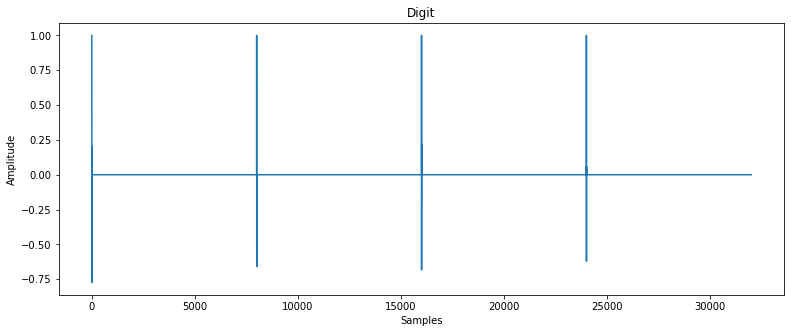

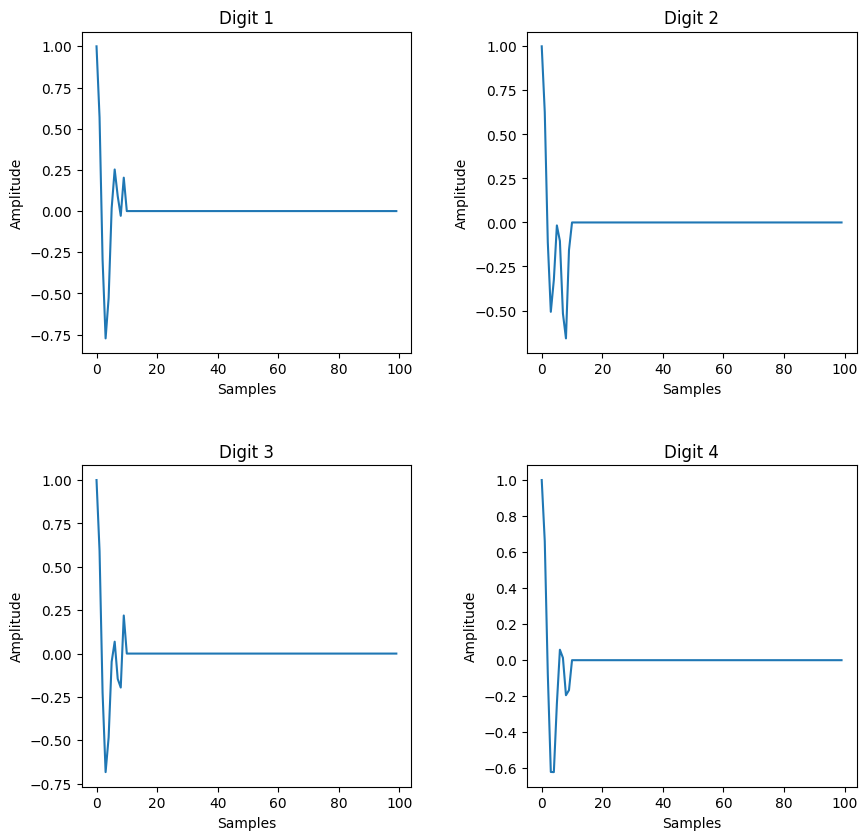

In [ ]:
plt.figure(figsize=(13,5))
plt.title('Digit')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(x)

digitlen=int(len(x)/4)
digit1 = x[0:digitlen]
digit2 = x[digitlen:2*digitlen]
digit3 = x[2*digitlen:3*digitlen]
digit4 = x[3*digitlen:4*digitlen]

plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=.35)
plt.subplot(2, 2, 1)
plt.title('Digit 1')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit1[0:100])
plt.subplot(2, 2, 2)
plt.title('Digit 2')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit2[0:100])
plt.subplot(2, 2, 3)
plt.title('Digit 3')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit3[0:100])
plt.subplot(2, 2, 4)
plt.title('Digit 4')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(digit4[0:100])

Here the digits are just small pulsesthat are no more than 20 samples.

## **(b-iii) Choose L and N:** 

I chose my N and L to be 100 because after some trail and error they were the values that resolved the first digit the best. If I went to small all the frequencies would be mashed toghter and if I went to large I couldn't tell where the frequency points are. I am also using a hamming window so I pefer a larger L

In [ ]:
N = 100
L = 100

## **(b-iv) Magnitude spectra:**

In this section I use fft to get the spectrum of the digits, then plot them against k. I made k with an np.arange that is the same length as N, and acts as the index for the spectrums.

<StemContainer object of 3 artists>

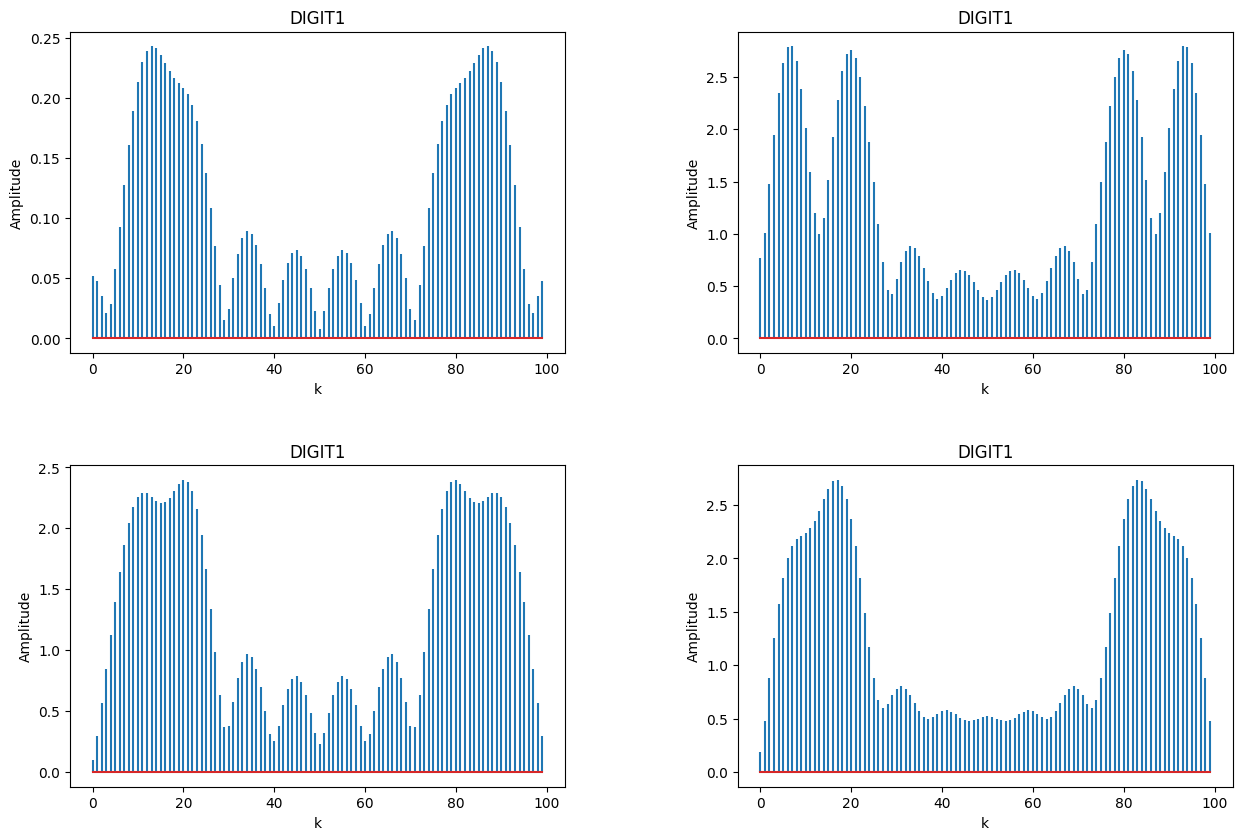

In [ ]:

k = np.arange(0,N)
plt.figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=.35)
plt.subplot(2, 2, 1)
plt.title('DIGIT1')
plt.xlabel('k')
plt.ylabel('Amplitude')
diff = len(digit1)-L

paddigit1 = (np.array( list(digit1) + list(np.zeros(diff))))
Ham1 = spsig.hamming(L)*digit1[0:L]

DIGIT1 = np.fft.fft(Ham1,N)


plt.stem(k,abs(DIGIT1),markerfmt=' ',use_line_collection=1)



DIGIT2 = np.fft.fft(digit2,N)
plt.subplot(2, 2, 2)
plt.title('DIGIT1')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k,abs(DIGIT2),markerfmt=' ',use_line_collection=1)

DIGIT3 = np.fft.fft(digit3,N)
plt.subplot(2, 2, 3)
plt.title('DIGIT1')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k,abs(DIGIT3),markerfmt=' ',use_line_collection=1)

DIGIT4 = np.fft.fft(digit4,N)
plt.subplot(2, 2, 4)
plt.title('DIGIT1')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k,abs(DIGIT4),markerfmt=' ',use_line_collection=1)

This time the sinusiods are blending toghter a lot compared to before where it was clear where they lie. This is due to the sidelobes of the signal overlapping with one another. They cause these strange waveforms.

## **(b-v) Maximum indices:**

The first thing I did was reset my axis to zoom in on the correct frequencies. For there I picke K vaules that seemed reasonable.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performanc

<StemContainer object of 3 artists>

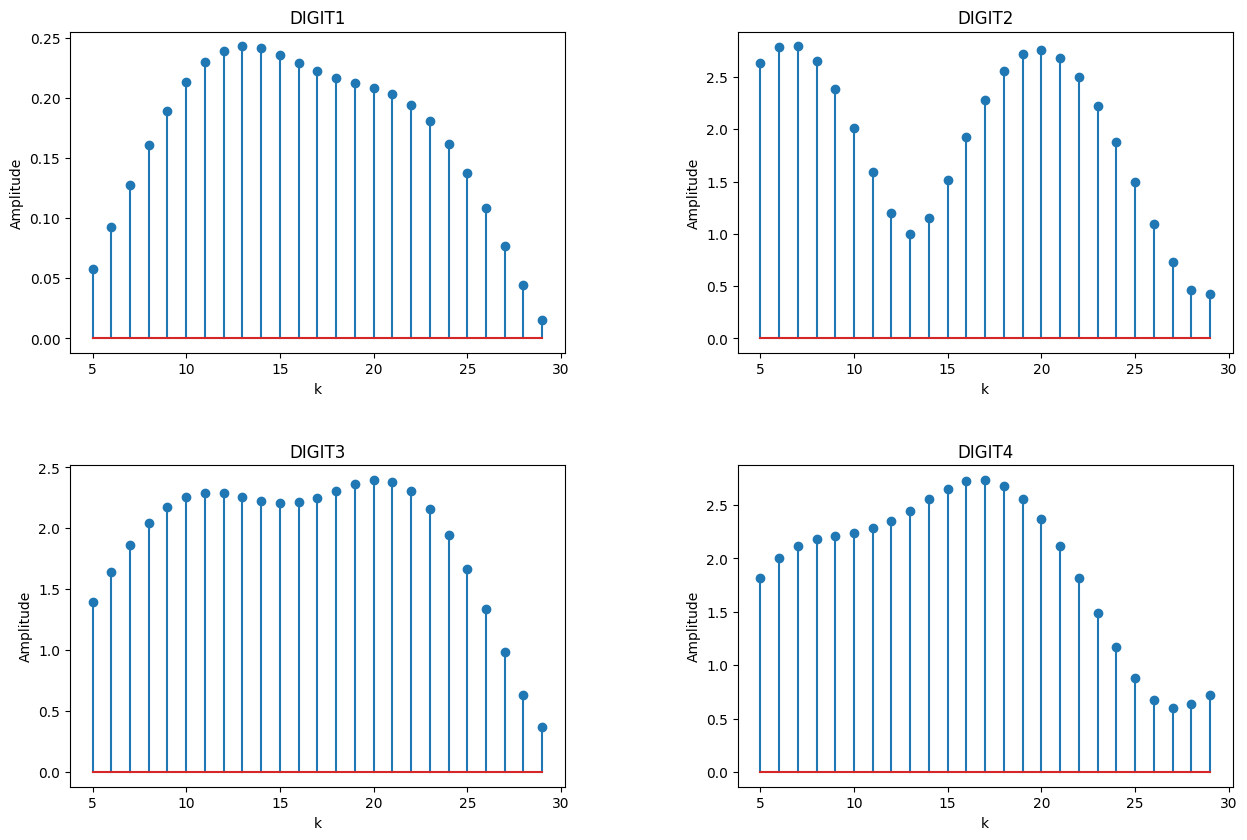

In [ ]:
plt.figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.35, hspace=.35)
plt.subplot(2, 2, 1)
plt.title('DIGIT1')
plt.xlabel('k')
plt.ylabel('Amplitude')
k11 = 12
k12 = 18
k21 = 8
k22 = 20
k31 = 12
k32 = 20
k41 = 11
k42 = 17
plt.stem(k[5:30],abs(DIGIT1[5:30]))
plt.subplot(2, 2, 2)
plt.title('DIGIT2')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k[5:30],abs(DIGIT2[5:30]))
plt.subplot(2, 2, 3)
plt.title('DIGIT3')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k[5:30],abs(DIGIT3[5:30]))
plt.subplot(2, 2, 4)
plt.title('DIGIT4')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.stem(k[5:30],abs(DIGIT4[5:30]))

I zoomed in the axis to see what the peaks are. I estimated them to be around the k vaules that I wrote down. I am not very confident on k11 and k12 or k41 and k42, but the rest are pretty clear.

## **(b-vi) Maximum frequencies:**

In this section I take the previous K values and multiply them by fbin to get the frequency points that the peaks occure at. I decided fbin by taking the sampling frequncy and dividing it by N. 

In [ ]:
fbin = 8000/N

f11 = k11*fbin
f12 = k12*fbin
print("Digit 1 frequencies: ",f11,f12)


f21 = k21*fbin
f22 = k22*fbin
print("Digit 2 frequencies: ",f21,f22)

f31 = k31*fbin
f32 = k32*fbin
print("Digit 3 frequencies: ",f31,f32)

f41 = k41*fbin
f42 = k42*fbin
print("Digit 4 frequencies: ",f41,f42)

Digit 1 frequencies:  960.0 1440.0
Digit 2 frequencies:  640.0 1600.0
Digit 3 frequencies:  960.0 1600.0
Digit 4 frequencies:  880.0 1360.0


In this section I take the previous K values and multiply them by fbin to get the frequency points that the peaks occure at. I decided fbin by taking the sampling frequncy and dividing it by N. 

## **(b-vii) Determine buttons pressed:**

My number is #AD8. There was definatley alot more approximations this time around due to how small the pulses are. This is due to the amount of samples I used, 100. Few samples means a large fbin, which also results in less frequency resolution. In this previous section I was off by 2-3Hz, but here I am off by 20-40 Hz.
 

# **(c) Spectral Analysis Discussion:**

My approach to finding N and L were very different for part b than for part a. In part an N and L didn't really matter so long as they were large enough. In part b however, they matter a lot more. Part b had the problem of close sinusoids, so there had to be a window that didn't have the side lobs overlapping the other frequency. I chose a hamming window to reduce this, but they still looked pretty close together and hard to distinguish. The peaks did not correspond to the same frequencies either, they were very different. This may be due to the small impulses or the fact that they were different signals to begin with. The first part was a lot more precise as to where the peak where, but with part b there was a lot more estimating involved. The two parts parts had different button presses than the first

# **(d) FIR Filter Design:**

## **(d-i) Filter characteristics.**

In this section I determine the requirments for the filter. I used the equations from the book to get δ pass and A pass , δstop and Astop , f
pass and ωpass , f
stop and ωstop.

In [ ]:
fpass = 941
fstop = 1209
df = fstop-fpass
fs = 8000
fc = 0.5*(fpass+fstop)

Astop = 100
Apass = 0

dpass = ((10 ** (Apass/20)) - 1 ) / ((10 ** (Apass/20)) + 1 )
dstop = 10 ** (-Astop / 20)
delta = min(dpass,dstop)
wpass = fpass/(fs * 2/np.pi)
wstop = (fstop)/(fs*2/np.pi)
A = -20*np.log10(delta)

print('dpass = ', dpass)
print('Apass = ', Apass)
print('dstop = ', dstop)
print('Astop = ',Astop)
print('fpass = ', fpass)
print('wpass = ', wpass)
print('fstop = ',fstop)
print('wstop = ', wstop)

dpass =  0.0
Apass =  0
dstop =  1e-05
Astop =  100
fpass =  941
wpass =  0.1847649179392497
fstop =  1209
wstop =  0.23738659488687874


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


## **(d-ii) Window choice.**

I am going to use a Kaiser window. I chose this because the other types of windows can't provide enough attenuation to cut the signal upper frequencies out of the range of human hearing. Hamming and rectangular are fixed in thier outputs.

## **(d-iii) Window parameters.**

Here are the extra parameters that I needed to caluclate

In [ ]:
alpha = 0.1102*(A - 8.7)
D = (A - 7.95) / 14.36

N = round( D*fs )
if N % 2 == 0:  
   N=N+1  
print("alpha = ",alpha)
print("N = ",int(N))
print("D = ",D)

alpha =  10.06126
N =  51281
D =  6.41016713091922


I imported fir here

In [ ]:
def fir(x,h):
# FIR y = fir(x,h)
# This function implements filtering of a signal through an FIR filter
# Inputs: x: vector - The signal to be filtered (length L)
# h: vector - The filter coefficients (length M+1)
# Output: y: vector - The output signal (length N=L+M)
  L = len(x)
  M = len(h)-1
  N = L+M
  y = np.zeros(N) # output signal
  w = np.zeros(M+1) # internal state vector for delayed input signal
  for n in range(0,L):
    w[0] = x[n] # update w0 to current input for ease of internal state update below
    y[n] = h.dot(w)
    for l in range(M,0,-1): # update feedforward internal states
      w[l] = w[l-1]
  # second loop for input-off transient
  for n in range(L,N):
    w[0] = 0 # update w0 to no input
    y[n] = h.dot(w)
    for l in range(M,0,-1): # update feedforward internal states
      w[l] = w[l-1]
  return y

## **(d-iv) Impulse response.**

In this section I plot the frequency response of h in a stem plot. It looks like a sinc fucntion which I belive is correct, because that is what the windowed version of a low pass filter looks like.

<StemContainer object of 3 artists>

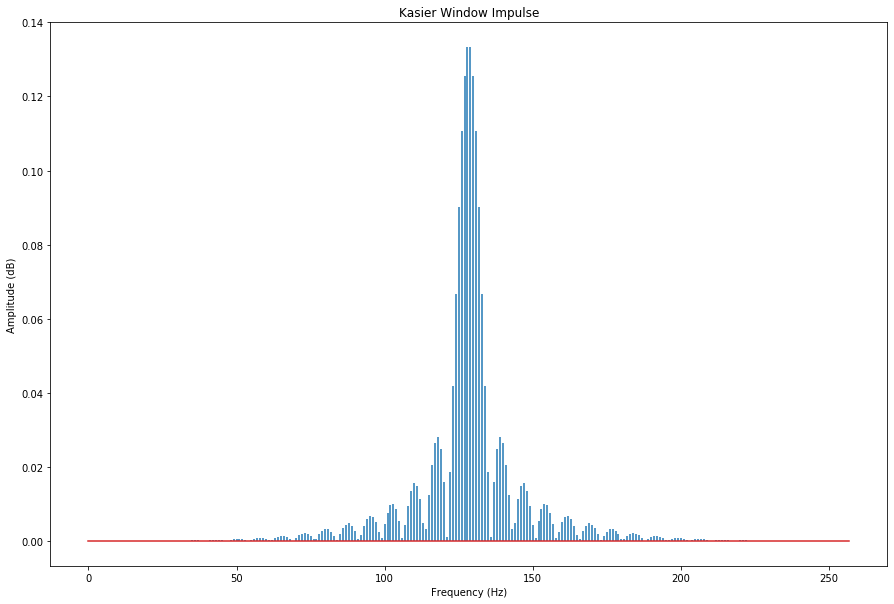

In [ ]:
delta =np.array( [1] + list(np.zeros(int(N))) )
plt.figure(figsize=(15,10))
plt.title('Kasier Window Impulse')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
L_kr,beta_kr=spsig.kaiserord(A,delta_w_norm)
h_kaiser=spsig.firwin(L_kr,wc_norm,window=('kaiser',beta_kr))

plt.stem(abs(h_kaiser),markerfmt=' ',use_line_collection=1)





I used stem to plot the frequency 

## **(d-v) Passband magnitude response.**
In this section I plot magnitude response of the passband in linear units. Fortuantles spsig produces linear units so there is no need to change anything. I used the lines plots from homework 7 on the plots to show the pass bands.

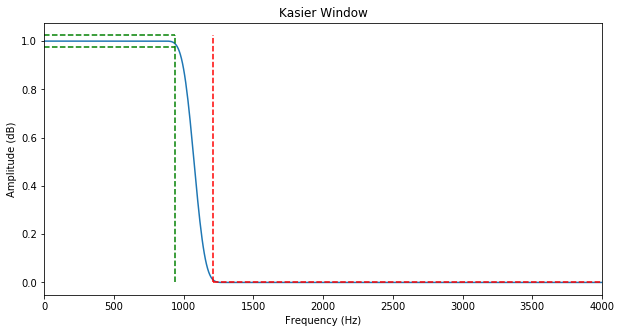

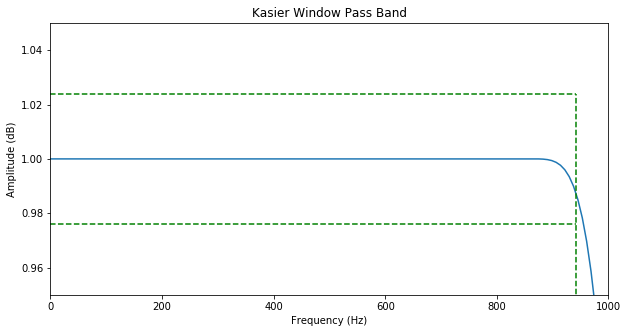

In [ ]:
w1,h = spsig.freqz(h_kaiser, 1, 1024)
f = w1 * fs / (np.pi)


plt.figure(figsize=(10,5))

plt.title('Kasier Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')

plt.axis(xmin=0, xmax=4000)
plt.plot(f, (abs(h)))



plt.plot([0,fpass],[1+dpass,1+dpass],'g--')
plt.plot([0,fpass],[1-dpass,1-dpass],'g--')

plt.plot([fpass,fpass],[0,1+dpass],'g--')

plt.plot([fstop,fstop],[0,1+dpass],'r--')
plt.plot([fstop,fs/2],[dstop,dstop],'r--')
plt.figure(figsize=(10,5))

plt.title('Kasier Window Pass Band')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')


plt.axis(xmin=0, xmax=1000,ymin=.95, ymax=1.05)
plt.plot(f, (abs(h)))


plt.plot([0,fpass],[1+dpass,1+dpass],'g--')
plt.plot([0,fpass],[1-dpass,1-dpass],'g--')

plt.plot([fpass,fpass],[0,1+dpass],'g--')
plt.plot([fstop,fstop],[0,1+dpass],'r--')



I zoomed in to show that there is little to no ossilation on the top at all in linear units. This filter stays within its bounds 1+dpass and 1-dpass, which means that it satifies the condtions. 

## **(d-vi) Stopband magnitude response.**

In this section I plotted the magnitude of the stopband in db. I had to convert the output of the magnitude reponse to dB by running it through the equation hdb = 20*np.log10(h). Then I convert the the line to dB so that it shows up in the correction location of the graph.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 720x360 with 0 Axes>

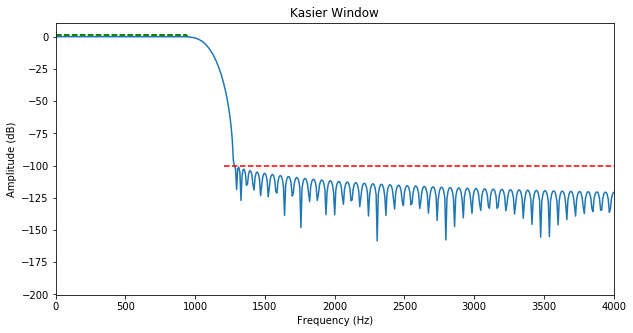

In [ ]:
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))

plt.title('Kasier Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
hdb = 20*np.log10(h)
plt.axis(xmin=0, xmax=4000)
plt.plot(f, (hdb))



plt.plot([0,fpass],[1+dpass,1+dpass],'g--')
plt.plot([0,fpass],[1-dpass,1-dpass],'g--')
plt.plot([fpass,fpass],[0,1+dpass],'g--')
plt.plot(np.arange(fstop,fs/2+1,fs/2-fstop),20*np.log10([dstop,dstop]),'r--')






This filter meets the requiment because it stays under dpass which is what I wanted.

## **(d-vii) Filter signal.**

In this section I take my window and filter it with the signal. I used our old fir filter, but python's filter work as well. I multiplied the signal by 100 so it was more audible.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


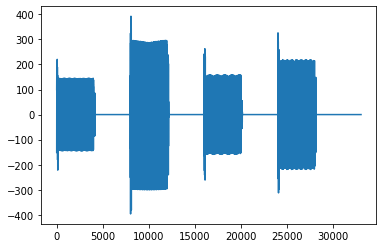

In [ ]:
fs,x= scipy.io.wavfile.read('signal_long.wav')
t=np.arange(0,(len(x))/float(fs),1./fs)
y = fir(x, h)
y = y*100
plt.plot(y)
scipy.io.wavfile.write('y_1.wav',fs,y.astype('int16'))

Listening to the audio, I can hear the diffrence between x and y.They sound like they are at a different pitch, which is what happens when you filter out a frequency from a tone that is two sinusiods. It is very noticable on the very last digit. The plot of the filter looks correct as well because there aer frequencies cut out of the digits.